In [1]:
import datetime as dt

import numpy as np

import algotrading_v40.data_accessors.cleaned as dac
import algotrading_v40.data_selectors.cusum as ds_c
import algotrading_v40.structures.date_range as sdr
import algotrading_v40.structures.instrument_desc as sid

In [2]:
data = dac.get_cleaned_data(
  [
    sid.EquityDesc(symbol="TRENT", market=sid.Market.INDIAN_MARKET),
    sid.EquityDesc(symbol="HDFCBANK", market=sid.Market.INDIAN_MARKET),
    sid.EquityDesc(symbol="GRASIM", market=sid.Market.INDIAN_MARKET),
    sid.EquityDesc(symbol="ICICIBANK", market=sid.Market.INDIAN_MARKET),
  ],
  sdr.DateRange(dt.date(2021, 1, 1), dt.date(2021, 4, 10)),
)
data._instrument_desc_to_df_list

{EquityDesc(market=<Market.INDIAN_MARKET: 'indian_market'>, symbol='TRENT'): [                                    open    high     low   close  volume
  bar_close_timestamp                                                     
  2021-01-01 03:45:59.999000+00:00  690.90  691.95  688.40  689.05    1831
  2021-01-01 03:46:59.999000+00:00  689.60  690.75  688.05  689.50    1279
  2021-01-01 03:47:59.999000+00:00  689.50  689.50  688.30  689.50     588
  2021-01-01 03:48:59.999000+00:00  689.50  691.00  689.30  690.30    2465
  2021-01-01 03:49:59.999000+00:00  690.30  690.65  689.50  690.15    1548
  ...                                  ...     ...     ...     ...     ...
  2021-04-09 09:55:59.999000+00:00  727.75  729.00  727.75  728.65    1075
  2021-04-09 09:56:59.999000+00:00  727.80  728.90  727.75  728.00    2126
  2021-04-09 09:57:59.999000+00:00  728.00  728.30  727.00  728.05    1081
  2021-04-09 09:58:59.999000+00:00  728.30  728.35  728.00  728.00     432
  2021-04-09 09:59:59.99

In [3]:
df = data.get_full_df_for_instrument_desc(
  sid.EquityDesc(symbol="TRENT", market=sid.Market.INDIAN_MARKET)
).iloc[:1000]
df.head()

,open,high,low,close,volume
bar_close_timestamp,,,,,
2021-01-01 03:45:59.999000+00:00,690.9,691.95,688.40,689.05,1831
2021-01-01 03:46:59.999000+00:00,689.6,690.75,688.05,689.50,1279
2021-01-01 03:47:59.999000+00:00,689.5,689.50,688.30,689.50,588
2021-01-01 03:48:59.999000+00:00,689.5,691.00,689.30,690.30,2465
2021-01-01 03:49:59.999000+00:00,690.3,690.65,689.50,690.15,1548


In [4]:
r = np.log(df["open"]).diff()
df["vol"] = r.ewm(span=30).std()
df = df.iloc[100:]
df["vol"]

bar_close_timestamp
2021-01-01 05:25:59.999000+00:00    0.000772
2021-01-01 05:26:59.999000+00:00    0.000746
2021-01-01 05:27:59.999000+00:00    0.000794
2021-01-01 05:28:59.999000+00:00    0.000868
2021-01-01 05:29:59.999000+00:00    0.000840
                                      ...   
2021-01-05 07:50:59.999000+00:00    0.000350
2021-01-05 07:51:59.999000+00:00    0.000339
2021-01-05 07:52:59.999000+00:00    0.000366
2021-01-05 07:53:59.999000+00:00    0.000356
2021-01-05 07:54:59.999000+00:00    0.000374
Name: vol, Length: 900, dtype: float64

In [5]:
m = 2
df["selected"] = ds_c.cusum(
  s=df["open"],
  thresholds=m * df["vol"],
  f_diff=lambda x: np.log(x).diff(),
)

In [6]:
df["selected"].value_counts(dropna=False)

selected
 0    771
-1     66
 1     63
Name: count, dtype: int64

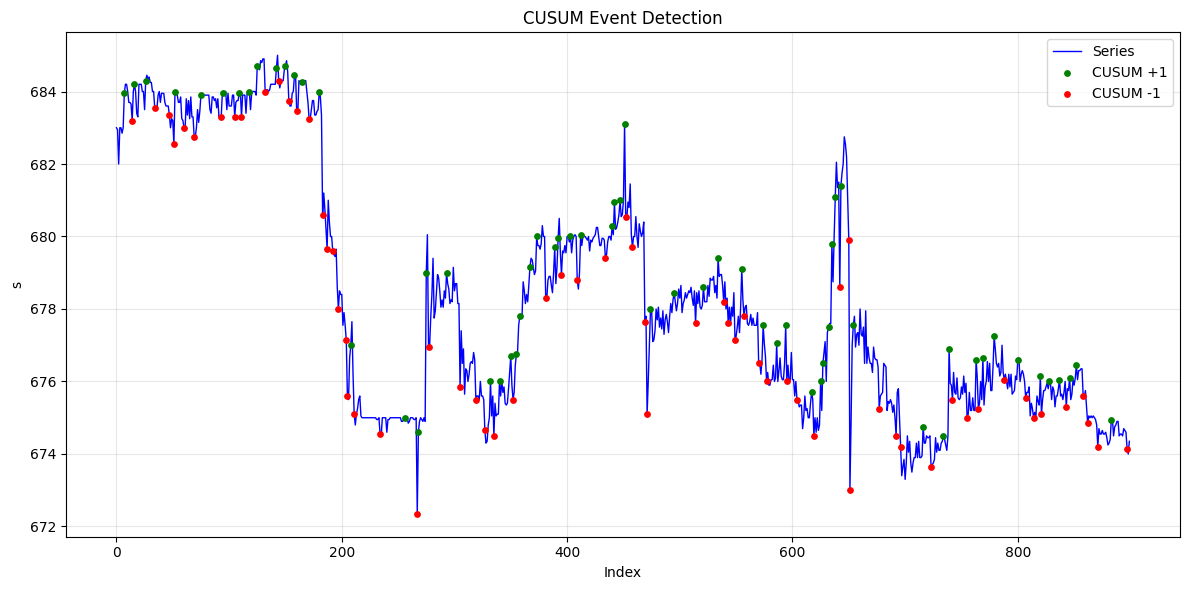

In [7]:
ds_c.plot_cusum_result(s=df["open"], cusum=df["selected"])